In [126]:
import pandas as pd
import numpy as np

df = pd.read_excel("Book1.xlsx")

df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80913 entries, 0 to 80912
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample No.      80913 non-null  int64  
 1   Month           80913 non-null  object 
 2   Year            80913 non-null  int64  
 3   Unit_code       80913 non-null  object 
 4   Date            80913 non-null  object 
 5   V_Code          68567 non-null  object 
 6   G_Code          59154 non-null  object 
 7   Ryot Code       80912 non-null  object 
 8   Grower's Name   80732 non-null  object 
 9   Father's Name   80402 non-null  object 
 10  Village         80707 non-null  object 
 11  Circle          80507 non-null  object 
 12  Zone            79465 non-null  object 
 13  Region          79345 non-null  object 
 14  Land Type       80801 non-null  object 
 15  Soil Type       79688 non-null  object 
 16  Previous Crop   80909 non-null  object 
 17  Identification  43533 non-null 

,Sample No.,Month,Year,Unit_code,Date,V_Code,G_Code,Ryot Code,Grower's Name,Father's Name,...,"pH,Range","EC,Range","OC,Range","N,Range","P,Range","K,Range","Zn,Range","Cu,Range","Fe,Range","S,Range"
0,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
1,1,Jan,2013,A,2013-01-23 00:00:00,133,12,1330012,DHANPAL SINGH,SEETARAM,...,Slightly Saline,Normal,Medium,Medium,Medium,Low,Low,Low,Low,Low
2,2,Mar,2013,A,2013-03-29 00:00:00,133,12,1330012,DHANPAL SINGH,SEETARAM,...,Alkaline,Critical for Ger,Low,Low,Low,Low,Low,High,High,Low
3,3,Mar,2013,A,2013-03-30 00:00:00,794,767,7940767,PREMWATI,SURENDRA PAL SINGH,...,Alkaline,Critical for Ger,Low,Low,Low,Low,Medium,High,High,Medium
4,4,Aug,2013,A,2013-08-05 00:00:00,37,137,370137,CHHOTE LAL,KEDAR,...,Slightly Acidic,Normal,Low,Low,Low,Low,Medium,Medium,High,High


In [127]:
df.columns

Index(['Sample No.', 'Month', 'Year', 'Unit_code', 'Date', 'V_Code ',
       'G_Code ', 'Ryot Code', 'Grower's Name', 'Father's Name ', 'Village',
       'Circle', 'Zone', 'Region', 'Land Type', 'Soil Type', 'Previous Crop',
       'Identification', 'pH', 'EC, m S', 'OC,Reading', 'OC %', 'N,Kg/H',
       'P,Kg/H', 'K,Kg/H', 'Zn,ppm', 'Cu,ppm', 'Fe,ppm', 'S (kg/ha)',
       'pH,Range', 'EC,Range', 'OC,Range', 'N,Range', 'P,Range', 'K,Range',
       'Zn,Range', 'Cu,Range', 'Fe,Range', 'S,Range'],
      dtype='object')

In [128]:
print("Total Soil Types:", df["Village"].nunique())
print("Unique Soil Types:", df["Village"].unique())
# Option 1: Convert to list and print fully
villages = df["Village"].unique().tolist()
print(villages)

# Option 2: Loop through and print one per line
for v in df["Village"].unique():
    print(v)

# Option 3: Save to CSV for inspection
pd.Series(df["Village"].unique()).to_csv("unique_villages.csv", index=False)


Total Soil Types: 2870
Unique Soil Types: [11 'HANN PASGAWAN' 'BAGRETHI' ... 'SABIRPUR' 'AASAMPUR' 'SADHO SARIE']
[11, 'HANN PASGAWAN', 'BAGRETHI', 'KP PIPROLA', 'LODHIAPUR', 'SIKTARA', 'MUKADDARPUR RAIDAS', 'AJBAPUR', 'ALLIPUR', 'BIJOLI SAHASPUR', 'BADAGAON', 'HAJIPUR', 'PALHAPUR', 'SOHANA CHANDILA', 'MUBARAKPUR', 'BHOGIPUR PATHAK', 'PASAGAVA', 'NAYAGOAN KISHORI', 'SOHAUNA-CHANDILA', 'PANAI', 'DELPANDERWA', 'BAHIRMA', 'UDAIPUR', 'JEERA BOJHI', 'TAL SAYAR', 'JALALPUR', 'JAMUKA', 'HARIHARPUR-BIJOLI', 'LALSAGAR', 'PASGAVA', 'THAKIYA BHAU', 'KANDHRAPUR', 'MAHAMOODPUR NAZAR', 'UDAYPUR', 'TURKAHTA', 'MAHMADPUR NAZIR', 'DARIYABAD', 'BAIDHA', 'DHAKIA BHAU', 'FRENDA', 'PATNA ', 'DHARAMPUR', 'GOKAN', 'GULAULI', 'SISORA-NASIR', 'KODELI', 'MOHMADPUR ZAZIR', 'MAHMADPUR-KHURD', 'CHHATIYA SARRAIYA', 'KHIRIYA JATAVPUR', 'KANGHARAPUR', 'BARI', 'MOHD PUR KHURD', 'SHANKERPUR RAJA', 'PATNA', 'RAMAPUR', 'BHETHUWA', 'BANDRAHA', 'AMBARI', 'MAHAMMADPUR', 'CHAK PIHANI', 'SAIDAPUR', 'BARKHERIA JAT', 'BASARA', 

In [129]:
import re
import pandas as pd

def normalize_village(v):
    if pd.isna(v):
        return None
    v = str(v)                 # ← FIX
    v = v.upper()
    v = re.sub(r'[^A-Z ]', ' ', v)
    v = re.sub(r'\s+', ' ', v).strip()
    return v

df['village_clean'] = df['Village'].apply(normalize_village)


In [130]:
district_rules = {
    'LAKHIMPUR KHERI': [
        'PASGAWAN', 'MAIGALGANJ', 'MITAULI', 'MOHAMMADI',
        'KAPASI', 'PHOOLBEHTA', 'NIGHASAN'
    ],
    'HARDOI': [
        'PIHANI', 'SHAHABAD', 'SANDILA', 'BILGRAM',
        'TODARPUR', 'HARIHARPUR'
    ],
    'SITAPUR': [
        'SIDHAULI', 'MAHOLI'
    ],
    'BUDAUN': [
        'BISAULI'
    ],
    'BHAGALPUR': [
        'NAVGACHIA', 'KURSELLA', 'BIHARGANJ'
    ],
    'KHAGARIA': [
        'KHAGARIA'
    ]
}


In [131]:
def assign_district(village):
    if village is None:
        return 'UNKNOWN'
    for district, keys in district_rules.items():
        for k in keys:
            if k in village:
                return district
    return 'UNKNOWN'

df['district'] = df['village_clean'].apply(assign_district)


In [132]:
print("Total Soil Types:", df["district"].nunique())
print("Unique Soil Types:", df["district"].unique())
# Option 1: Convert to list and print fully
villages = df["district"].unique().tolist()
print(villages)

# Option 2: Loop through and print one per line
for v in df["district"].unique():
    print(v)


Total Soil Types: 7
Unique Soil Types: ['UNKNOWN' 'LAKHIMPUR KHERI' 'HARDOI' 'KHAGARIA' 'BHAGALPUR' 'SITAPUR'
 'BUDAUN']
['UNKNOWN', 'LAKHIMPUR KHERI', 'HARDOI', 'KHAGARIA', 'BHAGALPUR', 'SITAPUR', 'BUDAUN']
UNKNOWN
LAKHIMPUR KHERI
HARDOI
KHAGARIA
BHAGALPUR
SITAPUR
BUDAUN


In [133]:
df.columns

Index(['Sample No.', 'Month', 'Year', 'Unit_code', 'Date', 'V_Code ',
       'G_Code ', 'Ryot Code', 'Grower's Name', 'Father's Name ', 'Village',
       'Circle', 'Zone', 'Region', 'Land Type', 'Soil Type', 'Previous Crop',
       'Identification', 'pH', 'EC, m S', 'OC,Reading', 'OC %', 'N,Kg/H',
       'P,Kg/H', 'K,Kg/H', 'Zn,ppm', 'Cu,ppm', 'Fe,ppm', 'S (kg/ha)',
       'pH,Range', 'EC,Range', 'OC,Range', 'N,Range', 'P,Range', 'K,Range',
       'Zn,Range', 'Cu,Range', 'Fe,Range', 'S,Range', 'village_clean',
       'district'],
      dtype='object')

In [134]:
drop_cols = [
    "Sample No.", "Ryot Code", "Grower's Name", "Father's Name ","Circle","Zone","Region","village_clean",
    "Village", "Identification", "Date","V_Code ","Unit_code",
    "G_Code "
]

df = df.drop(columns=drop_cols, errors="ignore")


In [135]:
df.columns

Index(['Month', 'Year', 'Land Type', 'Soil Type', 'Previous Crop', 'pH',
       'EC, m S', 'OC,Reading', 'OC %', 'N,Kg/H', 'P,Kg/H', 'K,Kg/H', 'Zn,ppm',
       'Cu,ppm', 'Fe,ppm', 'S (kg/ha)', 'pH,Range', 'EC,Range', 'OC,Range',
       'N,Range', 'P,Range', 'K,Range', 'Zn,Range', 'Cu,Range', 'Fe,Range',
       'S,Range', 'district'],
      dtype='object')

In [136]:
df.head()

,Month,Year,Land Type,Soil Type,Previous Crop,pH,"EC, m S","OC,Reading",OC %,"N,Kg/H",...,"EC,Range","OC,Range","N,Range","P,Range","K,Range","Zn,Range","Cu,Range","Fe,Range","S,Range",district
0,2,3,15,16,17,19.00,20.000,21.0,22.00,23.0,...,31,32,33,34,35,36,37,38,39,UNKNOWN
1,Jan,2013,LOW LAND,LOAMY SOIL,VACANT,7.91,0.290,17.0,0.69,483.0,...,Normal,Medium,Medium,Medium,Low,Low,Low,Low,Low,LAKHIMPUR KHERI
2,Mar,2013,LOW LAND,ALKALI SOIL,VACANT,10.33,1.005,20.3,0.14,98.0,...,Critical for Ger,Low,Low,Low,Low,Low,High,High,Low,LAKHIMPUR KHERI
3,Mar,2013,LOW LAND,ALKALI SOIL,VACANT,10.35,1.208,20.6,0.32,224.0,...,Critical for Ger,Low,Low,Low,Low,Medium,High,High,Medium,UNKNOWN
4,Aug,2013,UPLAND,SANDY SOIL,VACANT,6.63,0.108,19.0,0.17,119.0,...,Normal,Low,Low,Low,Low,Medium,Medium,High,High,UNKNOWN


In [137]:
df.shape

(80913, 27)

In [138]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns


In [139]:
num_cols

Index(['Year', 'pH', 'EC, m S', 'OC,Reading', 'OC %', 'N,Kg/H', 'P,Kg/H',
       'K,Kg/H', 'Zn,ppm', 'Cu,ppm', 'Fe,ppm', 'S (kg/ha)'],
      dtype='object')

In [140]:
cat_cols

Index(['Month', 'Land Type', 'Soil Type', 'Previous Crop', 'pH,Range',
       'EC,Range', 'OC,Range', 'N,Range', 'P,Range', 'K,Range', 'Zn,Range',
       'Cu,Range', 'Fe,Range', 'S,Range', 'district'],
      dtype='object')

In [141]:
# Numeric → median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [142]:
month_map = {
    "Jan":1, "Feb":2, "Mar":3, "Apr":4,
    "May":5, "Jun":6, "Jul":7, "Aug":8,
    "Sep":9, "Oct":10, "Nov":11, "Dec":12
}

df["Month_num"] = df["Month"].map(month_map)
df.drop(columns=["Month"], inplace=True)


In [143]:
df["Land_Soil"] = (
    df["Land Type"].astype(str) + "_" + df["Soil Type"].astype(str)
)


In [144]:
print("Total Land Type:", df["Land Type"].nunique())
print("Unique Soil Types:", df["Land Type"].unique())
print("Total Values:", df["Land Type"].count())
print("Total Missing Values:", df["Land Type"].isnull().sum())



Total Land Type: 7
Unique Soil Types: [15 'LOW LAND ' 'UPLAND' 'Low land' 'Up Land' 'Low Land' 'LOW LAND']
Total Values: 80913
Total Missing Values: 0


In [145]:
df["Land Type"] = df["Land Type"].str.lower().str.strip()
land_corrections = {
    'upland': 'up land',
    'up land': 'up land',
}

df['Land Type'] = df['Land Type'].replace(land_corrections)

In [146]:
print("Total Land Type:", df["Land Type"].nunique())
print("Unique Soil Types:", df["Land Type"].unique())
print("Total Values:", df["Land Type"].count())
print("Total Missing Values:", df["Land Type"].isnull().sum())



Total Land Type: 2
Unique Soil Types: [nan 'low land' 'up land']
Total Values: 80912
Total Missing Values: 1


In [147]:
print("Total Soil Types:", df["Soil Type"].nunique())
print("Unique Soil Types:", df["Soil Type"].unique())
print("Total Values:", df["Soil Type"].count())
print("Total Missing Values:", df["Soil Type"].isnull().sum())

Total Soil Types: 26
Unique Soil Types: [16 'LOAMY SOIL' 'ALKALI SOIL' 'SANDY SOIL' 'SANDY LOAM' 'CLAY LOAM'
 'CLAY SOIL' 'SANDY CLAY '
 '                                                                                                               '
 'Loamy' 'Sandy' 'Clay' 'LOAM' 'LOAM ' 'CLAY' 'SAND ' 'LAND ' 'CLAY '
 '  CLAY' 'SANDY' 'SANDY CLAY' 'SAND' ' ' 'sandy leom' 'leom'
 ' leom sandy']
Total Values: 80913
Total Missing Values: 0


In [148]:
df['Soil Type'] = df['Soil Type'].str.lower().str.strip()
df['Soil Type'] = df['Soil Type'].replace(r'^\s*$', np.nan, regex=True)


In [149]:
soil_corrections = {
    'leom': 'loam',
    'sandy leom': 'sandy loam',
    'leom sandy': 'sandy loam'
}

df['Soil Type'] = df['Soil Type'].replace(soil_corrections)


In [150]:
def standardize_soil(soil):
    if pd.isna(soil):
        return 'unknown'
    soil = soil.strip()

    if 'alkali' in soil:
        return 'alkali'
    if 'sandy clay' in soil:
        return 'sandy clay'
    if 'clay loam' in soil:
        return 'clay loam'
    if 'sandy loam' in soil:
        return 'sandy loam'
    if soil in ['clay']:
        return 'clay'
    if soil in ['sand', 'sandy']:
        return 'sandy'
    if soil in ['loam', 'loamy']:
        return 'loamy'

    return 'unknown'

df['Soil Type'] = df['Soil Type'].apply(standardize_soil)


In [151]:
print("Total Soil Types:", df["Soil Type"].nunique())
print("Unique Soil Types:", df["Soil Type"].unique())
print("Total Values:", df["Soil Type"].count())
print("Total Missing Values:", df["Soil Type"].isnull().sum())

Total Soil Types: 8
Unique Soil Types: ['unknown' 'alkali' 'sandy loam' 'clay loam' 'sandy clay' 'loamy' 'sandy'
 'clay']
Total Values: 80913
Total Missing Values: 0


In [152]:
print("Total Previous Crop:", df["Previous Crop"].nunique())
print("Unique Previous Crop:", df["Previous Crop"].unique())
print("Total Values:", df["Previous Crop"].count())
print("Total Missing Values:", df["Previous Crop"].isnull().sum())


Total Previous Crop: 82
Unique Previous Crop: [17 'VACANT ' 'VACANT' 'PIPERMINT' 'WHEAT ' 'SUGARCANE' 'KHIRA' 'PADDY'
 'GROUND NUT' 'FODDER' 'MUSTARD' 'PADDY ' 'PADDY  ' 'POTATO' 'LENTIL'
 'TORAI ' 'DHAINCHA' 'URD' 'TIL' 'GREEN PEA' 'JAWAR' 'BHINDI' 'PARVAL'
 'LOUKI' 'MAIZE' 'COTTON' 'BAJRA' 'TOMATO' 'GRAM' 'VEGETABLE' ' PADDY'
 'HALDI' 'ARBI' 'BITTER MELON' 'BARSEEM' 'Ground Nut' 'Wheat' 'Dhaicha'
 'Vacant' 'Paddy' 'Khera' 'Vegitable' 'Fader' 'Louki' 'Urd' 'S'
 'Sugar cane' 'Kheera' 'sugar cane' 'Maize' 'Jowar' 'Mustard' 'Fadder'
 'Lobiya' 'Lahi' 'Bajara' 'Mango tree' 'Patato' 'Musturd' 'Bag' 'Mustrd'
 'Banana' 'wheat' 'LINE SEED' 'CHILI' 'MUSK MILON' 'POPULAR' 'CUCUMBER'
 'BRINJAL' 'CORIANDER' 'TIMBER' 'BLACK GRAM' 'SUGARCANE ' 'SUGRCANE '
 'MASTARD ' 'SUGARCNE ' 'ARHAR' 'WATER MILLION' 'SUGAR CANE' 'WHEAT'
 'ONION' 'sugarcane']
Total Values: 80913
Total Missing Values: 0


In [153]:
df['Previous Crop'] = (
    df['Previous Crop']
    .str.lower()
    .str.strip()
)

df['Previous Crop'] = df['Previous Crop'].replace(r'^\s*$', np.nan, regex=True)


In [154]:
crop_corrections = {
    'musturd': 'mustard',
    'mustrd': 'mustard',
    'mastard': 'mustard',
    'sugrcane': 'sugarcane',
    'sugar cane': 'sugarcane',
    'sugarcne': 'sugarcane',
    'patato': 'potato',
    'kheera': 'cucumber',
    'khira': 'cucumber',
    'water million': 'watermelon',
    'musk milon': 'muskmelon',
    'vegitable': 'vegetable',
    'fadder': 'fodder',
    'fader': 'fodder',
    'jowar': 'jowar',
    'bajara': 'bajra'
}

df['Previous Crop'] = df['Previous Crop'].replace(crop_corrections)


In [155]:
def map_crop_category(crop):
    if pd.isna(crop):
        return 'unknown'

    crop = crop.lower()

    cereals = ['wheat', 'paddy', 'rice', 'maize', 'jowar', 'bajra']
    pulses = ['urd', 'lentil', 'gram', 'lobiya', 'black gram', 'arhar']
    oilseeds = ['mustard', 'ground nut', 'til', 'line seed']
    vegetables = [
        'potato', 'tomato', 'bhindi', 'brinjal', 'onion',
        'cucumber', 'parval', 'torai', 'louki', 'chili'
    ]
    fodder = ['fodder', 'barseem', 'dhancha']
    cash_crops = ['sugarcane', 'cotton', 'pipermint']
    fruits = ['banana', 'mango']
    
    if crop in cereals:
        return 'cereal'
    if crop in pulses:
        return 'pulse'
    if crop in oilseeds:
        return 'oilseed'
    if crop in vegetables:
        return 'vegetable'
    if crop in fodder:
        return 'fodder'
    if crop in cash_crops:
        return 'cash_crop'
    if crop in fruits:
        return 'fruit_tree'
    if crop in ['vacant', 'fallow']:
        return 'fallow'

    return 'other'

df['Crop_Category'] = df['Previous Crop'].apply(map_crop_category)


In [156]:
print("Total Previous Crop:", df["Previous Crop"].nunique())
print("Unique Previous Crop:", df["Previous Crop"].unique())
print("Total Values:", df["Previous Crop"].count())
print("Total Missing Values:", df["Previous Crop"].isnull().sum())


Total Previous Crop: 50
Unique Previous Crop: [nan 'vacant' 'pipermint' 'wheat' 'sugarcane' 'cucumber' 'paddy'
 'ground nut' 'fodder' 'mustard' 'potato' 'lentil' 'torai' 'dhaincha'
 'urd' 'til' 'green pea' 'jawar' 'bhindi' 'parval' 'louki' 'maize'
 'cotton' 'bajra' 'tomato' 'gram' 'vegetable' 'haldi' 'arbi'
 'bitter melon' 'barseem' 'dhaicha' 'khera' 's' 'jowar' 'lobiya' 'lahi'
 'mango tree' 'bag' 'banana' 'line seed' 'chili' 'muskmelon' 'popular'
 'brinjal' 'coriander' 'timber' 'black gram' 'arhar' 'watermelon' 'onion']
Total Values: 80912
Total Missing Values: 1


In [157]:
df.head()

,Year,Land Type,Soil Type,Previous Crop,pH,"EC, m S","OC,Reading",OC %,"N,Kg/H","P,Kg/H",...,"P,Range","K,Range","Zn,Range","Cu,Range","Fe,Range","S,Range",district,Month_num,Land_Soil,Crop_Category
0,3,NaN,unknown,NaN,19.00,20.000,21.0,22.00,23.0,24.00,...,34,35,36,37,38,39,UNKNOWN,NaN,15_16,unknown
1,2013,low land,unknown,vacant,7.91,0.290,17.0,0.69,483.0,46.59,...,Medium,Low,Low,Low,Low,Low,LAKHIMPUR KHERI,1.0,LOW LAND _LOAMY SOIL,fallow
2,2013,low land,alkali,vacant,10.33,1.005,20.3,0.14,98.0,11.57,...,Low,Low,Low,High,High,Low,LAKHIMPUR KHERI,3.0,LOW LAND _ALKALI SOIL,fallow
3,2013,low land,alkali,vacant,10.35,1.208,20.6,0.32,224.0,13.98,...,Low,Low,Medium,High,High,Medium,UNKNOWN,3.0,LOW LAND _ALKALI SOIL,fallow
4,2013,up land,unknown,vacant,6.63,0.108,19.0,0.17,119.0,10.87,...,Low,Low,Medium,Medium,High,High,UNKNOWN,8.0,UPLAND_SANDY SOIL,fallow


In [158]:
df.columns

Index(['Year', 'Land Type', 'Soil Type', 'Previous Crop', 'pH', 'EC, m S',
       'OC,Reading', 'OC %', 'N,Kg/H', 'P,Kg/H', 'K,Kg/H', 'Zn,ppm', 'Cu,ppm',
       'Fe,ppm', 'S (kg/ha)', 'pH,Range', 'EC,Range', 'OC,Range', 'N,Range',
       'P,Range', 'K,Range', 'Zn,Range', 'Cu,Range', 'Fe,Range', 'S,Range',
       'district', 'Month_num', 'Land_Soil', 'Crop_Category'],
      dtype='object')

# 1] Nurtient N

In [160]:
target = "N,Kg/H"
leak_cols = [
    "N,Kg/H"
]
other_nutrients = [
    "P,Kg/H", "K,Kg/H",
    "Zn,ppm", "Cu,ppm", "Fe,ppm", "S (kg/ha)"
]

X = df.drop(columns=leak_cols+ other_nutrients)
y = df[target]
from sklearn.model_selection import train_test_split

# New Code
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())
from sklearn.ensemble import RandomForestRegressor

N_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

N_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, r2_score

y_pred = N_reg.predict(X_test)
y_true = y_test

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² :", r2_score(y_true, y_pred))



MAE: 18.57294425386136
R² : 0.9543688389528646


In [161]:
import joblib; 
joblib.dump(N_reg, "saved_model/NKgH_model.pkl")


['saved_model/NKgH_model.pkl']

OC %                          0.263404
OC,Range_Low                  0.145422
N,Range_Low                   0.127280
OC,Range_High                 0.113629
OC,Reading                    0.097551
N,Range_High                  0.077405
N,Range_Medium                0.071728
OC,Range_Medium               0.050603
K,Range_Low                   0.007351
Year                          0.004938
pH                            0.003406
Previous Crop_vacant          0.003338
Crop_Category_fallow          0.002960
P,Range_Low                   0.002669
K,Range_Medium                0.002420
EC, m S                       0.002270
K,Range_High                  0.002204
Fe,Range_High                 0.002120
Land_Soil_UPLAND_CLAY SOIL    0.001452
Month_num                     0.001300
dtype: float64


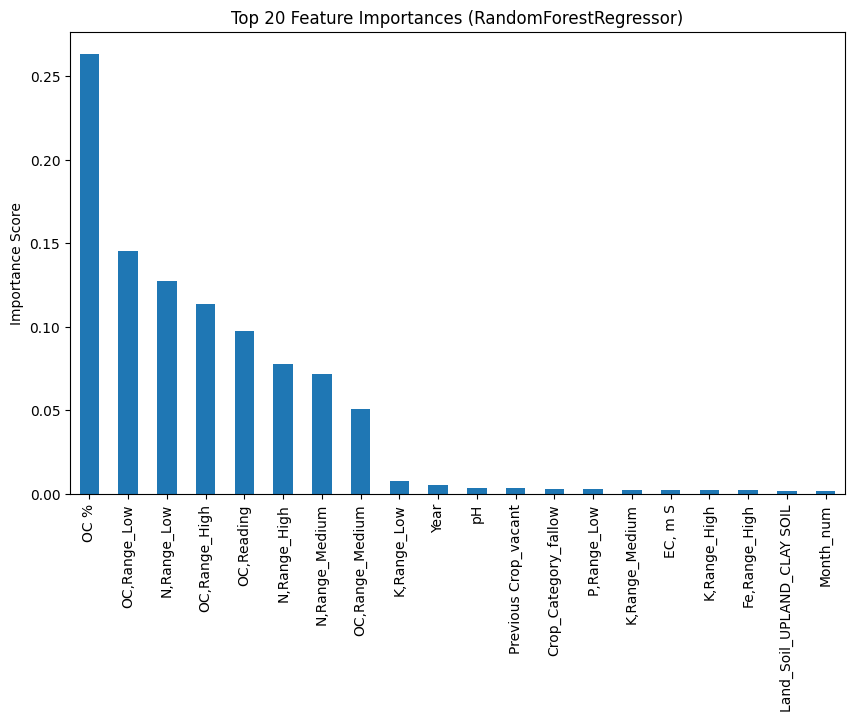

In [59]:
import pandas as pd

# Get feature importances
importances = rf_reg.feature_importances_

# Create a Series with feature names
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort and display top features
print(feature_importances.sort_values(ascending=False).head(20))

# Optional: visualize with a bar plot
import matplotlib.pyplot as plt

feature_importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,6))
plt.title("Top 20 Feature Importances (RandomForestRegressor)")
plt.ylabel("Importance Score")
plt.show()


In [60]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    rf_reg, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": r.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)


                            Feature  Importance
4                              OC %    0.223340
73                     OC,Range_Low    0.095453
76                      N,Range_Low    0.089157
72                    OC,Range_High    0.054028
3                        OC,Reading    0.036846
..                              ...         ...
54                Previous Crop_til   -0.000004
135          Land_Soil_UPLAND_SANDY   -0.000005
106   Land_Soil_LOW LAND _CLAY SOIL   -0.000012
62              Previous Crop_wheat   -0.000015
107  Land_Soil_LOW LAND _LOAMY SOIL   -0.000058

[155 rows x 2 columns]


In [258]:
df.columns

Index(['Year', 'Circle', 'Zone', 'Region', 'Land Type', 'Soil Type',
       'Previous Crop', 'pH', 'EC, m S', 'OC,Reading', 'OC %', 'N,Kg/H',
       'P,Kg/H', 'K,Kg/H', 'Zn,ppm', 'Cu,ppm', 'Fe,ppm', 'S (kg/ha)',
       'Month_num', 'Land_Soil', 'Crop_Category'],
      dtype='object')

# 2] Nutrient P

In [162]:
target = "P,Kg/H"
leak_cols = [
    "P,Kg/H"
]
other_nutrients = [
    "P,Kg/H", "K,Kg/H",
    "Zn,ppm", "Cu,ppm", "Fe,ppm", "S (kg/ha)"
]

X = df.drop(columns=leak_cols+ other_nutrients)
y = df[target]
from sklearn.model_selection import train_test_split

# New Code
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())
from sklearn.ensemble import RandomForestRegressor

P_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

P_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, r2_score

y_pred = P_reg.predict(X_test)
y_true = y_test

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² :", r2_score(y_true, y_pred))



MAE: 9.818971992986308
R² : 0.5745641103703691


In [163]:
import joblib; 
joblib.dump(P_reg, "saved_model/PKgH_model.pkl")


['saved_model/PKgH_model.pkl']

P,Range_High                   0.320952
P,Range_Low                    0.195087
P,Range_Medium                 0.084796
OC,Reading                     0.083272
Year                           0.079022
pH                             0.017344
N,Kg/H                         0.014608
Cu,Range_High                  0.013947
OC %                           0.013841
EC, m S                        0.013798
Fe,Range_High                  0.013794
Fe,Range_Low                   0.011760
Month_num                      0.011662
Crop_Category_fallow           0.007996
Previous Crop_vacant           0.007668
Zn,Range_Low                   0.006173
Land_Soil_UPLAND_SANDY SOIL    0.006115
Land_Soil_UPLAND_LOAMY SOIL    0.005793
Zn,Range_High                  0.005729
OC,Range_Low                   0.005460
dtype: float64


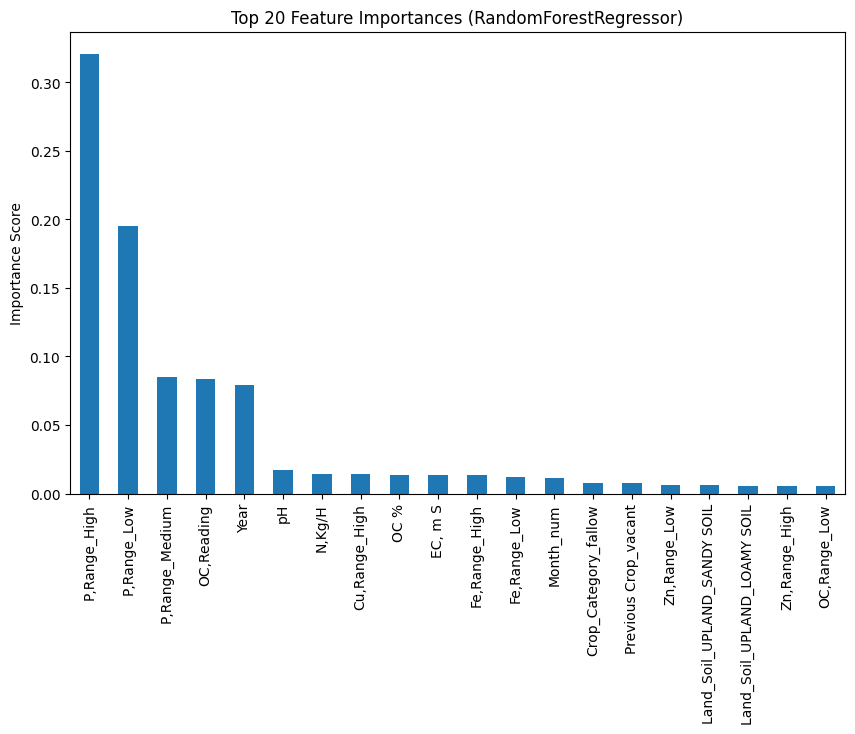

In [106]:
import pandas as pd

# Get feature importances
importances = rf_reg.feature_importances_

# Create a Series with feature names
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort and display top features
print(feature_importances.sort_values(ascending=False).head(20))

# Optional: visualize with a bar plot
import matplotlib.pyplot as plt

feature_importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,6))
plt.title("Top 20 Feature Importances (RandomForestRegressor)")
plt.ylabel("Importance Score")
plt.show()


# 3] Nutrient k

In [108]:
df.columns

Index(['Year', 'Land Type', 'Soil Type', 'Previous Crop', 'pH', 'EC, m S',
       'OC,Reading', 'OC %', 'N,Kg/H', 'P,Kg/H', 'K,Kg/H', 'Zn,ppm', 'Cu,ppm',
       'Fe,ppm', 'S (kg/ha)', 'pH,Range', 'EC,Range', 'OC,Range', 'N,Range',
       'P,Range', 'K,Range', 'Zn,Range', 'Cu,Range', 'Fe,Range', 'S,Range',
       'district', 'Month_num', 'Land_Soil', 'Crop_Category'],
      dtype='object')

In [164]:
target = "K,Kg/H"
leak_cols = [
    "K,Kg/H"
]
other_nutrients = [
    "P,Kg/H", "K,Kg/H",
    "Zn,ppm", "Cu,ppm", "Fe,ppm", "S (kg/ha)"
]

X = df.drop(columns=leak_cols+ other_nutrients)
y = df[target]
from sklearn.model_selection import train_test_split

# New Code
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())
from sklearn.ensemble import RandomForestRegressor

K_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

K_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, r2_score

y_pred = K_reg.predict(X_test)
y_true = y_test

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² :", r2_score(y_true, y_pred))



MAE: 32.62915384583484
R² : 0.7776819337908161


In [165]:
import joblib; 
joblib.dump(K_reg, "saved_model/KKgH_model.pkl")


['saved_model/KKgH_model.pkl']

# 4] Nutrient Zn

In [166]:
target = "Zn,ppm"
leak_cols = [
    "Zn,ppm"
]
other_nutrients = [
    "N,Kg/H","P,Kg/H", "K,Kg/H",
    "Zn,ppm", "Cu,ppm", "Fe,ppm", "S (kg/ha)"
]

X = df.drop(columns=leak_cols+ other_nutrients)
y = df[target]
from sklearn.model_selection import train_test_split


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())
from sklearn.ensemble import RandomForestRegressor

Zn_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

Zn_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, r2_score

y_pred = Zn_reg.predict(X_test)
y_true = y_test

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² :", r2_score(y_true, y_pred))



MAE: 0.15283452182817633
R² : 0.8069248160567655


In [167]:
import joblib; 
joblib.dump(Zn_reg, "saved_model/Znppm_model.pkl")


['saved_model/Znppm_model.pkl']

# 5] Nutrient cu

In [168]:
target = "Cu,ppm"
leak_cols = [
    "Cu,ppm"
]
other_nutrients = [
    "N,Kg/H","P,Kg/H", "K,Kg/H",
    "Zn,ppm", "Cu,ppm", "Fe,ppm", "S (kg/ha)"
]

X = df.drop(columns=leak_cols+ other_nutrients)
y = df[target]
from sklearn.model_selection import train_test_split


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())
from sklearn.ensemble import RandomForestRegressor

Cu_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

Cu_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, r2_score

y_pred = Cu_reg.predict(X_test)
y_true = y_test

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² :", r2_score(y_true, y_pred))



MAE: 0.1148785388710188
R² : 0.6697251055743216


In [169]:
import joblib; 
joblib.dump(Cu_reg, "saved_model/Cuppm_model.pkl")


['saved_model/Cuppm_model.pkl']

# 6]Nutrient Fe

In [170]:
target = "Fe,ppm"
leak_cols = [
    "Fe,ppm"
]
other_nutrients = [
    "N,Kg/H","P,Kg/H", "K,Kg/H",
    "Zn,ppm", "Cu,ppm", "Fe,ppm", "S (kg/ha)"
]

X = df.drop(columns=leak_cols+ other_nutrients)
y = df[target]
from sklearn.model_selection import train_test_split


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())
from sklearn.ensemble import RandomForestRegressor

Fe_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

Fe_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, r2_score

y_pred = Fe_reg.predict(X_test)
y_true = y_test

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² :", r2_score(y_true, y_pred))



MAE: 1.155636320240053
R² : 0.84319345306037


In [171]:
import joblib; 
joblib.dump(Fe_reg, "saved_model/Feppm_model.pkl")


['saved_model/Feppm_model.pkl']

Cu,Range_High                  0.361761
Cu,Range_Low                   0.180362
Cu,Range_Medium                0.121168
Year                           0.072619
OC,Reading                     0.028111
P,Range_Low                    0.022981
pH                             0.019131
Fe,Range_High                  0.016908
P,Range_High                   0.013762
OC %                           0.013560
EC, m S                        0.013272
Zn,Range_Low                   0.012524
Fe,Range_Low                   0.012492
Month_num                      0.010905
Zn,Range_Medium                0.010112
Land_Soil_UPLAND_SANDY SOIL    0.010101
Zn,Range_High                  0.006338
Land_Soil_UPLAND_LOAMY SOIL    0.005988
Crop_Category_fallow           0.005087
Previous Crop_vacant           0.004670
dtype: float64


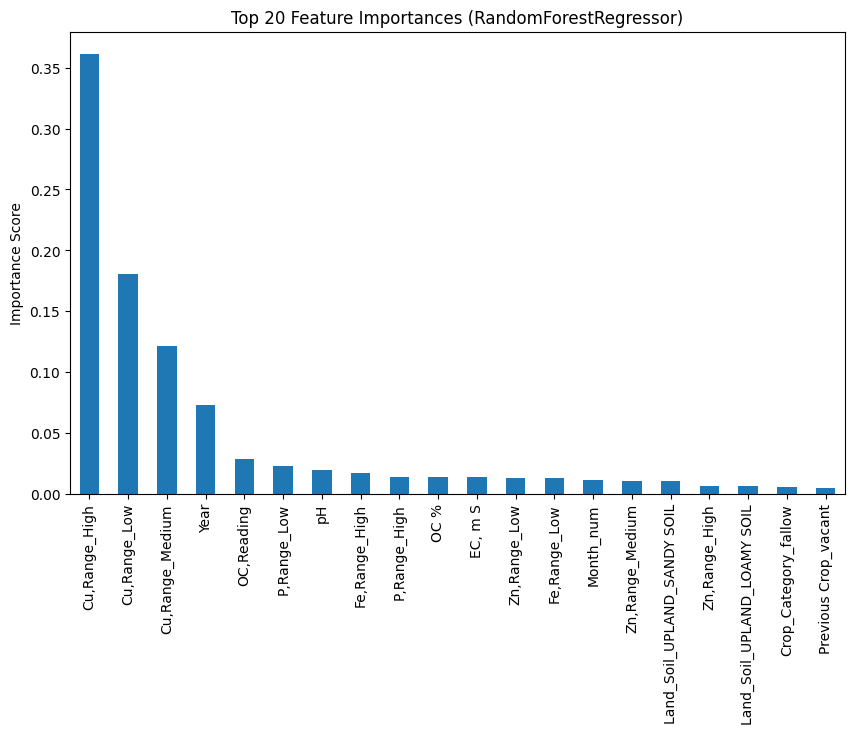

In [114]:
import pandas as pd

# Get feature importances
importances = rf_reg.feature_importances_

# Create a Series with feature names
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort and display top features
print(feature_importances.sort_values(ascending=False).head(20))

# Optional: visualize with a bar plot
import matplotlib.pyplot as plt

feature_importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,6))
plt.title("Top 20 Feature Importances (RandomForestRegressor)")
plt.ylabel("Importance Score")
plt.show()


# 7] Nutrient S

In [172]:
target = "S (kg/ha)"
leak_cols = [
    "S (kg/ha)"
]
other_nutrients = [
    "N,Kg/H","P,Kg/H", "K,Kg/H",
    "Zn,ppm", "Cu,ppm", "Fe,ppm", "S (kg/ha)"
]

X = df.drop(columns=leak_cols+ other_nutrients)
y = df[target]
from sklearn.model_selection import train_test_split


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())
from sklearn.ensemble import RandomForestRegressor

S_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

S_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, r2_score

y_pred = S_reg.predict(X_test)
y_true = y_test

print("MAE:", mean_absolute_error(y_true, y_pred))
print("R² :", r2_score(y_true, y_pred))





MAE: 2.3890889157398485
R² : 0.8854458804787472


In [173]:
import joblib; 
joblib.dump(S_reg, "saved_model/S_(kgha)_model.pkl")


['saved_model/S_(kgha)_model.pkl']

# Count Farmers on based in sample available

In [118]:
import pandas as pd
import numpy as np

df = pd.read_excel("Book1.xlsx")

df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80913 entries, 0 to 80912
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample No.      80913 non-null  int64  
 1   Month           80913 non-null  object 
 2   Year            80913 non-null  int64  
 3   Unit_code       80913 non-null  object 
 4   Date            80913 non-null  object 
 5   V_Code          68567 non-null  object 
 6   G_Code          59154 non-null  object 
 7   Ryot Code       80912 non-null  object 
 8   Grower's Name   80732 non-null  object 
 9   Father's Name   80402 non-null  object 
 10  Village         80707 non-null  object 
 11  Circle          80507 non-null  object 
 12  Zone            79465 non-null  object 
 13  Region          79345 non-null  object 
 14  Land Type       80801 non-null  object 
 15  Soil Type       79688 non-null  object 
 16  Previous Crop   80909 non-null  object 
 17  Identification  43533 non-null 

,Sample No.,Month,Year,Unit_code,Date,V_Code,G_Code,Ryot Code,Grower's Name,Father's Name,...,"pH,Range","EC,Range","OC,Range","N,Range","P,Range","K,Range","Zn,Range","Cu,Range","Fe,Range","S,Range"
0,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
1,1,Jan,2013,A,2013-01-23 00:00:00,133,12,1330012,DHANPAL SINGH,SEETARAM,...,Slightly Saline,Normal,Medium,Medium,Medium,Low,Low,Low,Low,Low
2,2,Mar,2013,A,2013-03-29 00:00:00,133,12,1330012,DHANPAL SINGH,SEETARAM,...,Alkaline,Critical for Ger,Low,Low,Low,Low,Low,High,High,Low
3,3,Mar,2013,A,2013-03-30 00:00:00,794,767,7940767,PREMWATI,SURENDRA PAL SINGH,...,Alkaline,Critical for Ger,Low,Low,Low,Low,Medium,High,High,Medium
4,4,Aug,2013,A,2013-08-05 00:00:00,37,137,370137,CHHOTE LAL,KEDAR,...,Slightly Acidic,Normal,Low,Low,Low,Low,Medium,Medium,High,High


In [121]:
sample_distribution = (
    farmer_sample_counts['num_samples']
    .value_counts()
    .sort_index()
    .reset_index()
)

sample_distribution.columns = ['num_samples', 'num_farmers']
print(sample_distribution)


    num_samples  num_farmers
0             1        42967
1             2         8969
2             3         2842
3             4         1138
4             5          478
5             6          224
6             7          129
7             8           59
8             9           19
9            10           21
10           11           11
11           12            6
12           13            4
13           14            1
14           15            1
15           16            5
16           17            3
17           18            3
18           19            1
19           24            1
20           25            1
21           35            1
22           36            1
23           40            1
24           53            1
25          101            1
26          164            1
27          183            1
28          300            1


In [120]:
farmer_sample_counts = (
    df.groupby('Ryot Code')
      .size()
      .reset_index(name='num_samples')
)
